In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
#基本设置
%matplotlib inline
%load_ext autoreload
%autoreload 2


## Mnist 分类
### a)网络结构

#### input - fully connected layer - ReLU - fully connected layer - softmax
    W1: First layer weights; has shape (H, D)
    b1: First layer biases; has shape (H,)
    W2: Second layer weights; has shape (C, H)
    b2: Second layer biases; has shape (C,)


### b)训练部分


### get data set

In [2]:
from nndl.data_utils import *
def get_MNIST_data(num_training=59000, num_validation=1000):
    # load the test and train data
    trainfile_X = './mnistDataset/train-images.idx3-ubyte'
    trainfile_y = './mnistDataset/train-labels.idx1-ubyte'
    testfile_X = './mnistDataset/t10k-images.idx3-ubyte'
    testfile_y = './mnistDataset/t10k-labels.idx1-ubyte'
    X_train = DataUtils(filename=trainfile_X).getImage()
    y_train = DataUtils(filename=trainfile_y).getLabel()
    X_test = DataUtils(testfile_X).getImage()
    y_test = DataUtils(testfile_y).getLabel()

    # set the validation set to 1000
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

#     # normalize the data (potentially important in binary figure) by subtract the mean image
#     mean_image = np.mean(X_train, axis=0)
#     X_train -= mean_image
#     X_val -= mean_image
#     X_test -= mean_image
    
    return X_train, y_train, X_val, y_val, X_test, y_test


In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (59000, 784)
Train labels shape:  (59000,)
Validation data shape:  (1000, 784)
Validation labels shape:  (1000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


## Optimize the neural network
### e) 最优模型 输出train error test error

In [4]:
from nndl.neural_net import *

best_net = None # store the best model into this 
input_size = 28*28
hidden_size = 500
num_classes = 10

opt_stats ={'val_acc_history':-1}

net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1700, batch_size=200,
            learning_rate=3e-1, learning_rate_decay= 0.99,
            reg=0.0005, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
if val_acc > np.max(opt_stats['val_acc_history']):
    opt_net = net
    opt_stats = stats       
    print('Validation accuracy: ', val_acc)
    

net = opt_net

best_net = net

iteration 0 / 1700: loss 2.3025858975781794
iteration 100 / 1700: loss 0.5923626950445254
iteration 200 / 1700: loss 0.3214912419013803
iteration 300 / 1700: loss 0.27438037146169236
iteration 400 / 1700: loss 0.28334221569923795
iteration 500 / 1700: loss 0.3150205097399046
iteration 600 / 1700: loss 0.25036785200745393
iteration 700 / 1700: loss 0.25975626091111004
iteration 800 / 1700: loss 0.16689762215307152
iteration 900 / 1700: loss 0.2514346253820122
iteration 1000 / 1700: loss 0.13933243962065103
iteration 1100 / 1700: loss 0.20321168244890558
iteration 1200 / 1700: loss 0.27893679667898574
iteration 1300 / 1700: loss 0.17089988370714862
iteration 1400 / 1700: loss 0.155404473198378
iteration 1500 / 1700: loss 0.13491010370857612
iteration 1600 / 1700: loss 0.19081005092249947
Validation accuracy:  0.975


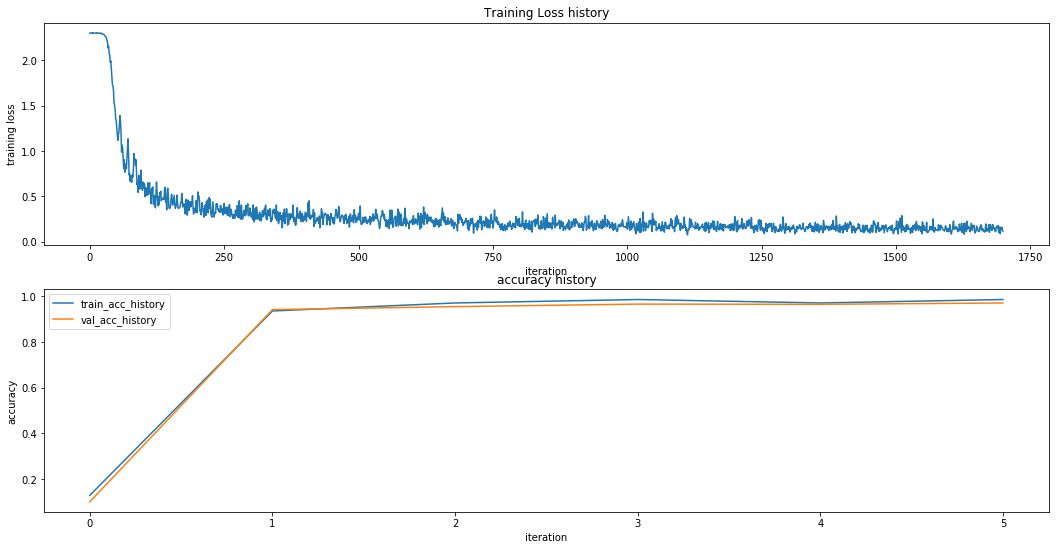

In [5]:
fig = plt.figure(figsize=(18, 9)) 

plt.subplot(211)
plt.plot(opt_stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')

plt.subplot(212)
plt.plot(opt_stats['train_acc_history'])
plt.plot(opt_stats['val_acc_history'])
plt.legend( ['train_acc_history', 'val_acc_history'])
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy history')
plt.show()

## Evaluate on test set 
### c) test部分

In [6]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9619


### d) 读取一个文件夹输出结果

In [12]:
import numpy as np 
import os
import glob 

# get imagedata into folder
# def create_image(X_test,data_path = "./imageData"):
#     for i,img in enumerate(X_test):
#             fig = plt.figure()
#             dpi = fig.dpi
#             fig.set_size_inches(28/ dpi, 28/ dpi)
#             plt.axis('off')
#             plt.imshow(img.reshape(28, 28), cmap='gray')
#             plt.savefig(data_path+"/test" + str(i) + ".png")
#             plt.close()
#             if i >3:
#                 break
# create_image(X_test)



In [13]:
from PIL import Image
from scipy.misc import imread

def create_test_data(data_path = "./imageData", img_type = "png"):
    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    imgs = glob.glob(data_path+"/*."+img_type)
    print(len(imgs))

    # shape of the input is supposed to be n*784
    imgdatas = np.ndarray((len(imgs),784), dtype=np.uint8)

    # load image one by one
    for imgname in imgs:       

        imgdatas[i] = imread(data_path + imgname[imgname.rindex("/"):], flatten=True, mode='L').reshape(784,)

        i += 1

    return imgdatas


In [14]:
# 输入指定文件夹
imgdatas = create_test_data()
print(best_net.predict(imgdatas))

------------------------------
Creating training images...
------------------------------
5


/Users/shuangyu/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
